In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# 한글 깨짐 방지 및 세부 설정
plt.rc('font', family='NanumBarunGothic', size=12)
plt.rc('figure', figsize=(10, 7))

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 음식별 온실가스 배출량

In [ ]:
food = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Food_Product_Emissions.csv')
food.head()

,Food product,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total from Land to Retail,Total Global Average GHG Emissions per kg,Unit of GHG Emissions
0,Apples,-0.029,0.000,0.225,0.004,0.096,0.044,0.017,0.357,0.43,kg CO2e per kg food produced
1,Bananas,-0.025,0.000,0.266,0.059,0.292,0.065,0.021,0.678,0.86,kg CO2e per kg food produced
2,Barley,0.009,0.000,0.176,0.128,0.035,0.497,0.264,1.109,1.18,kg CO2e per kg food produced
3,Beef (beef herd),16.278,1.878,39.388,1.269,0.346,0.247,0.164,59.570,99.48,kg CO2e per kg food produced
4,Beef (dairy herd),0.906,2.508,15.689,1.108,0.424,0.268,0.182,21.085,33.30,kg CO2e per kg food produced


In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Food product                               43 non-null     object 
 1   Land Use Change                            43 non-null     float64
 2   Feed                                       43 non-null     float64
 3   Farm                                       43 non-null     float64
 4   Processing                                 43 non-null     float64
 5   Transport                                  43 non-null     float64
 6   Packaging                                  43 non-null     float64
 7   Retail                                     43 non-null     float64
 8   Total from Land to Retail                  43 non-null     float64
 9   Total Global Average GHG Emissions per kg  43 non-null     float64
 10  Unit of GHG Emissions       

In [ ]:
# 컬럼: "토지 사용 변화" "사료" "농업" "가공" "운송" "포장" "유통" "전체" "kg 당 평균"

In [ ]:
# 결측값 확인
food.isna().sum().sum()

0

In [ ]:
# 컬럼면 변경, 선택
food.rename(columns={'Food product':'Food', 'Total Global Average GHG Emissions per kg':'GHG Emissions'}, inplace=True)
food = food[['Food', 'GHG Emissions']]

In [ ]:
# 음식 종류 확인
food['Food'].unique()

array(['Apples', 'Bananas', 'Barley', 'Beef (beef herd)',
       'Beef (dairy herd)', 'Beet Sugar', 'Berries & Grapes', 'Brassicas',
       'Cane Sugar', 'Cassava', 'Cheese', 'Citrus Fruit', 'Coffee',
       'Dark Chocolate', 'Eggs', 'Fish (farmed)', 'Groundnuts',
       'Lamb & Mutton', 'Maize', 'Milk', 'Nuts', 'Oatmeal', 'Olive Oil',
       'Onions & Leeks', 'Other Fruit', 'Other Pulses',
       'Other Vegetables', 'Palm Oil', 'Peas', 'Pig Meat', 'Potatoes',
       'Poultry Meat', 'Rapeseed Oil', 'Rice', 'Root Vegetables',
       'Shrimps (farmed)', 'Soybean Oil', 'Soymilk', 'Sunflower Oil',
       'Tofu', 'Tomatoes', 'Wheat & Rye', 'Wine'], dtype=object)

### 그룹화

In [ ]:
# 그룹화
def food_group(x):
  if x in ['Apples', 'Bananas', 'Berries & Grapes', 'Citrus Fruit', 'Other Fruit']:
    return 'Fruits'
  elif x in ['Brassicas', 'Cassava', 'Maize', 'Onions & Leeks', 'Potatoes', 'Tomatoes', 'Root Vegetables', 'Other Vegetables']:
    return 'Vegetables'
  elif x in ['Barley', 'Oatmeal', 'Wheat & Rye', 'Rice']: 
    return 'Grains'
  elif x in ['Peas', 'Other Pulses']:
    return 'Pulses'
  elif x in ['Groundnuts', 'Nuts']:
    return 'Nuts'
  elif x in ['Olive Oil', 'Palm Oil', 'Rapeseed Oil', 'Sunflower Oil', 'Soybean Oil']:
    return 'Oil'
  elif x in ['Beet Sugar', 'Cane Sugar']:
    return 'Sugar'
  else:
    return x

food['Food Group'] = food['Food'].apply(food_group)

# 음식 그룹별 온실가스 배출량 많은 순으로 정렬
food_group = food.groupby('Food Group')['GHG Emissions'].mean().sort_values(ascending=False)
food_group

Food Group
Beef (beef herd)     99.4800
Dark Chocolate       46.6500
Lamb & Mutton        39.7200
Beef (dairy herd)    33.3000
Coffee               28.5300
Shrimps (farmed)     26.8700
Cheese               23.8800
Fish (farmed)        13.6300
Pig Meat             12.3100
Poultry Meat          9.8700
Oil                   5.2860
Eggs                  4.6700
Tofu                  3.1600
Milk                  3.1500
Sugar                 2.5050
Grains                2.4200
Nuts                  1.8300
Wine                  1.7900
Pulses                1.3850
Soymilk               0.9800
Vegetables            0.9425
Fruits                0.8520
Name: GHG Emissions, dtype: float64

In [ ]:
# 반올림
food_group = food_group.apply(lambda x: round(x, 2))
food_group

Food Group
Beef (beef herd)     99.48
Dark Chocolate       46.65
Lamb & Mutton        39.72
Beef (dairy herd)    33.30
Coffee               28.53
Shrimps (farmed)     26.87
Cheese               23.88
Fish (farmed)        13.63
Pig Meat             12.31
Poultry Meat          9.87
Oil                   5.29
Eggs                  4.67
Tofu                  3.16
Milk                  3.15
Sugar                 2.50
Grains                2.42
Nuts                  1.83
Wine                  1.79
Pulses                1.39
Soymilk               0.98
Vegetables            0.94
Fruits                0.85
Name: GHG Emissions, dtype: float64

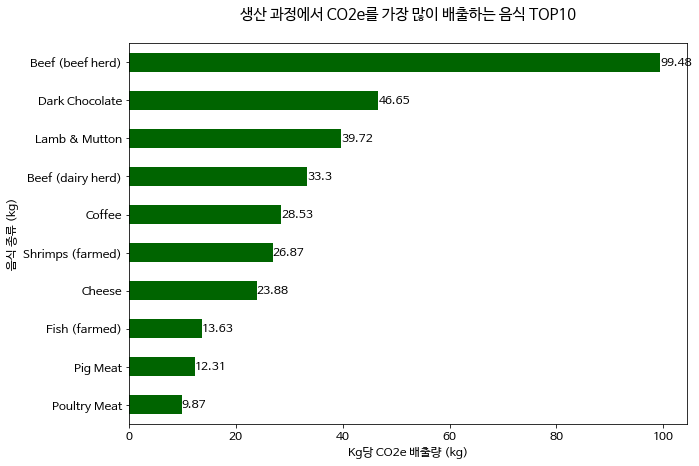

In [ ]:
# 음식 그룹별 온실가스 배출량 시각화
fig, ax = plt.subplots(figsize=(10, 7))
food_group.sort_values(ascending=True)[12:].plot(x='Food Group', y='GHG Emissions', kind='barh', ax=ax, color='darkgreen')
for i, v in enumerate(food_group.sort_values(ascending=True)[12:]):
  plt.text(v, i, v, va='center')
plt.ylabel("음식 종류 (kg)", size=12)
plt.xlabel("Kg당 CO2e 배출량 (kg)", size=12)
plt.title("생산 과정에서 CO2e를 가장 많이 배출하는 음식 TOP10\n", size= 15)
plt.show()

** CO2e : 이산화탄소환산톤. 온실가스를 이산화탄소 배출량으로 환산한 값

In [ ]:
# 과일, 채소 배출량
food_group.sort_values(ascending=False)[20:]

Food Group
Vegetables    0.94
Fruits        0.85
Name: GHG Emissions, dtype: float64

### 주행거리

In [ ]:
# 주행 온실가스 데이터 추가
food = pd.DataFrame(food_group, columns=['GHG Emissions'])
food.reset_index(inplace=True)
food['km'] = round(food['GHG Emissions'] / (97/1000), 2)
food.head()

,Food Group,GHG Emissions,km
0,Beef (beef herd),99.48,1025.57
1,Dark Chocolate,46.65,480.93
2,Lamb & Mutton,39.72,409.48
3,Beef (dairy herd),33.30,343.30
4,Coffee,28.53,294.12


In [ ]:
# 고기 여부 데이터 추가
food['meat'] = food['Food Group'].apply(lambda x: 'Meat' if x in ['Beef (beef herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat'] else 'Not Meat')
food['meat'].unique()

array(['Meat', 'Not Meat'], dtype=object)

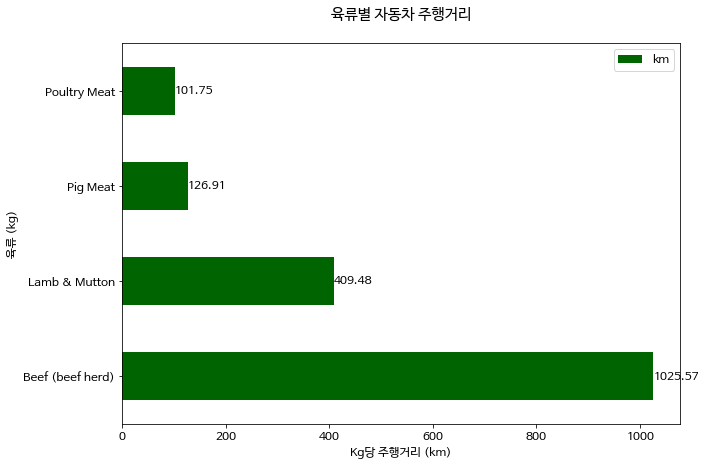

In [ ]:
# 고기 위주 시각화
fig, ax = plt.subplots(figsize=(10, 7))
food[food['meat']=='Meat'].sort_values(by='km', ascending=False).plot(x='Food Group', y='km', kind='barh', ax=ax, color='darkgreen')
for i, v in enumerate(food[food['meat']=='Meat'].sort_values(by='km', ascending=False)['km']):
  plt.text(v, i, v, va='center')
plt.ylabel("육류 (kg)", size=12)
plt.xlabel("Kg당 주행거리 (km)", size=12)
plt.title("육류별 자동차 주행거리\n", size= 15)
plt.show()

## 축산업 온실가스 배출량

In [4]:
# 2010년 자료
livestock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GLEAM_LivestockEmissions.csv')
livestock.head()

,Region,Animal species,Production system,Commodity,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e),...,"Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","LUC: soy & palm, CO2 (kg CO2e)","LUC: pasture expansion, CO2 (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"
0,Global,Cattle,Aggregated,Aggregated,160.3,2.916310e+10,4.674630e+12,9.449299e+11,2.648727e+12,1.080973e+12,...,1.740732e+11,7.419864e+11,4.687954e+10,3.870062e+11,2.509275e+12,1.394522e+11,1.649130e+11,4.215542e+10,1.585653e+10,9.955932e+10
1,Global,Cattle,Aggregated,Milk,86.7,1.888089e+10,1.637519e+12,2.756914e+11,9.676442e+11,3.941834e+11,...,7.166208e+10,2.543885e+11,1.497421e+10,NaN,8.856352e+11,8.200906e+10,6.813278e+10,2.993485e+10,3.252889e+09,8.929544e+10
2,Global,Cattle,Aggregated,Meat,295.4,1.028222e+10,3.037111e+12,6.692385e+11,1.681083e+12,6.867892e+11,...,1.024111e+11,4.875979e+11,3.190534e+10,3.870062e+11,1.623640e+12,5.744310e+10,9.678019e+10,1.222057e+10,1.260364e+10,1.026388e+10
3,Global,Cattle,Grassland systems,Aggregated,206.3,1.033817e+10,2.133054e+12,5.628062e+11,1.052965e+12,5.172829e+11,...,5.253660e+10,4.267612e+11,8.194330e+09,3.870062e+11,9.969096e+11,5.605552e+10,3.798508e+10,1.417326e+10,4.303272e+09,3.773092e+10
4,Global,Cattle,Grassland systems,Milk,95.0,6.940654e+09,6.592844e+11,9.286140e+10,3.713461e+11,1.950770e+11,...,2.156126e+10,1.587838e+11,2.412100e+09,NaN,3.369018e+11,3.444428e+10,1.473188e+10,1.078605e+10,9.998435e+08,3.462338e+10


In [ ]:
livestock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 22 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Region                                           583 non-null    object 
 1   Animal species                                   583 non-null    object 
 2   Production system                                583 non-null    object 
 3   Commodity                                        583 non-null    object 
 4   Emission Intensity (kg CO2e per kg protein)      583 non-null    float64
 5   Production (kg protein)                          543 non-null    float64
 6   Total GHG emissions (kg CO2e)                    543 non-null    float64
 7   Total CO2 emissions (kg CO2e)                    543 non-null    float64
 8   Total CH4 emissions (kg CO2e)                    543 non-null    float64
 9   Total N2O emissions (kg CO2e)   

In [5]:
livestock = livestock[['Region', 'Animal species', 'Commodity', 'Total GHG emissions (kg CO2e)', 'Total CO2 emissions (kg CO2e)', 'Total CH4 emissions (kg CO2e)', 'Total N2O emissions (kg CO2e)']]
livestock.head()

,Region,Animal species,Commodity,Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e)
0,Global,Cattle,Aggregated,4.674630e+12,9.449299e+11,2.648727e+12,1.080973e+12
1,Global,Cattle,Milk,1.637519e+12,2.756914e+11,9.676442e+11,3.941834e+11
2,Global,Cattle,Meat,3.037111e+12,6.692385e+11,1.681083e+12,6.867892e+11
3,Global,Cattle,Aggregated,2.133054e+12,5.628062e+11,1.052965e+12,5.172829e+11
4,Global,Cattle,Milk,6.592844e+11,9.286140e+10,3.713461e+11,1.950770e+11


In [ ]:
livestock['Region'].value_counts()

Global                             53
East Asia and Southeast Asia       53
Eastern Europe                     53
Latin America and the Caribbean    53
Near East and North Africa         53
North America                      53
Oceania                            53
Russian Federation                 53
South Asia                         53
Sub-Saharan Africa                 53
Western Europe                     53
Name: Region, dtype: int64

In [ ]:
livestock['Animal species'].value_counts()

Cattle       121
Chicken      121
Buffaloes     99
Sheep         99
Goats         99
Pigs          44
Name: Animal species, dtype: int64

In [ ]:
livestock['Commodity'].unique()

array(['Aggregated', 'Milk', 'Meat', 'Eggs'], dtype=object)

In [6]:
# 범위는 전세계, 동물 종류별로 그룹화
meat = livestock[livestock['Region']=='Global']
meat.drop('Region', axis=1, inplace=True)

# 고기만 선택
meat = meat[meat['Commodity']=='Meat']
meat.drop('Commodity', axis=1, inplace=True)
meat = meat.groupby('Animal species').sum()
meat

,Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e)
Animal species,,,,
Buffaloes,4.836913e+11,5.399012e+10,3.209370e+11,1.087642e+11
Cattle,6.074222e+12,1.338477e+12,3.362166e+12,1.373578e+12
Chicken,1.012583e+12,7.348422e+11,1.624566e+10,2.614949e+11
Goats,2.998545e+11,3.643984e+10,2.005732e+11,6.284151e+10
Pigs,1.638629e+12,7.477151e+11,5.086355e+11,3.822788e+11
Sheep,4.311667e+11,4.516168e+10,2.587220e+11,1.272830e+11


In [8]:
# 메탄(CH4), 이산화질소(N2O), 이산화탄소(CO2) -> Mt 단위로 변경
meat[['Total CH4 emissions (Mt CO2e)', 'Total CO2 emissions (Mt CO2e)', 'Total N2O emissions (Mt CO2e)']] = meat[['Total CH4 emissions (kg CO2e)', 'Total CO2 emissions (kg CO2e)', 'Total N2O emissions (kg CO2e)']].apply(lambda x: round(x*1e-8, 2))
meat = meat[['Total CH4 emissions (Mt CO2e)', 'Total CO2 emissions (Mt CO2e)', 'Total N2O emissions (Mt CO2e)']]
meat

,Total CH4 emissions (Mt CO2e),Total CO2 emissions (Mt CO2e),Total N2O emissions (Mt CO2e)
Animal species,,,
Buffaloes,3209.37,539.90,1087.64
Cattle,33621.66,13384.77,13735.78
Chicken,162.46,7348.42,2614.95
Goats,2005.73,364.40,628.42
Pigs,5086.35,7477.15,3822.79
Sheep,2587.22,451.62,1272.83


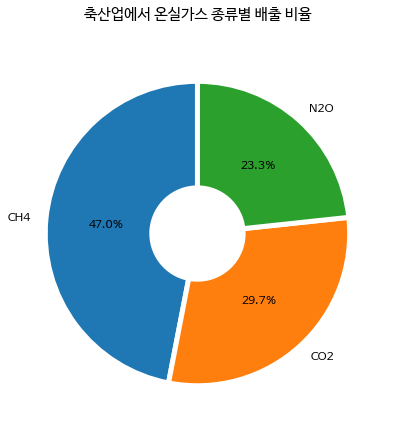

In [9]:
# 전체 온실가스 배출량에서 종류별 비율
meat_total = [meat['Total CH4 emissions (Mt CO2e)'].sum(), meat['Total CO2 emissions (Mt CO2e)'].sum(), meat['Total N2O emissions (Mt CO2e)'].sum()]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(meat_total, labels = ['CH4', 'CO2', 'N2O'], autopct='%.1f%%', startangle=90, wedgeprops=wedgeprops)
plt.title('축산업에서 온실가스 종류별 배출 비율\n', size= 15)
plt.show()

In [ ]:
# 전체 온실가스 배출량에서 종류별 배출량 수치
for x in meat_total:
  print(round(x, 2))

46672.79
29566.26
23162.41


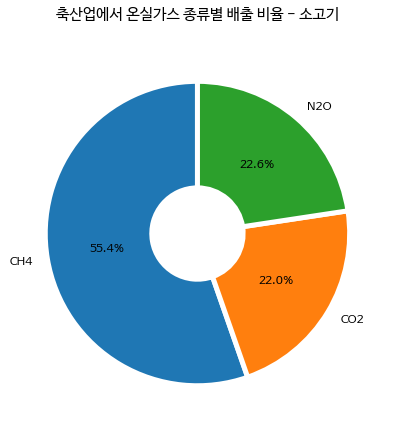

In [10]:
# 육류별 온실가스 배출량 - 소
fig, ax = plt.subplots(figsize=(10, 7))
cattle = [meat.loc['Cattle']]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(cattle, labels = ['CH4', 'CO2', 'N2O'], autopct='%.1f%%', startangle=90, wedgeprops=wedgeprops)
plt.title('축산업에서 온실가스 종류별 배출 비율 - 소고기\n', size= 15)
plt.show()

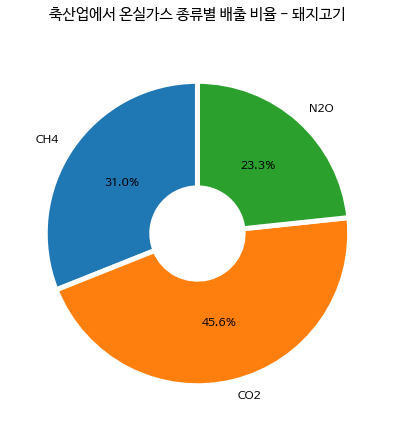

In [11]:
# 육류별 온실가스 배출량 - 돼지
pigs = [meat.loc['Pigs']]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(pigs, labels = ['CH4', 'CO2', 'N2O'], autopct='%.1f%%', startangle=90, wedgeprops=wedgeprops)
plt.title('축산업에서 온실가스 종류별 배출 비율 - 돼지고기\n', size= 15)
plt.show()

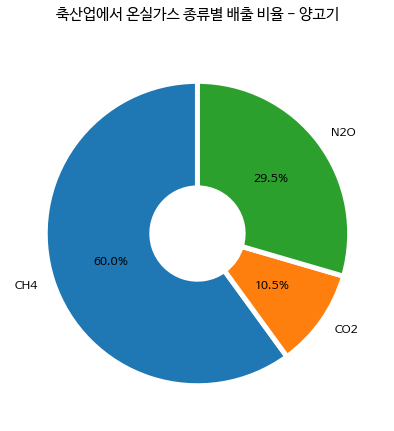

In [12]:
# 육류별 온실가스 배출량 - 양
sheep = [meat.loc['Sheep']]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(sheep, labels = ['CH4', 'CO2', 'N2O'], autopct='%.1f%%', startangle=90, wedgeprops=wedgeprops)
plt.title('축산업에서 온실가스 종류별 배출 비율 - 양고기\n', size= 15)
plt.show()

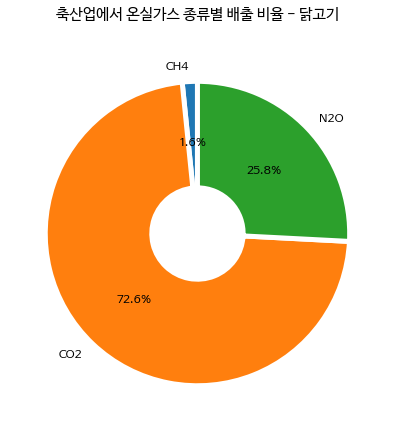

In [13]:
# 육류별 온실가스 배출량 - 닭
chicken = [meat.loc['Chicken']]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(chicken, labels = ['CH4', 'CO2', 'N2O'], autopct='%.1f%%', startangle=90, wedgeprops=wedgeprops)
plt.title('축산업에서 온실가스 종류별 배출 비율 - 닭고기\n', size= 15)
plt.show()